In [29]:
# This should be roughly the content of the first code cell
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)



In [30]:
# Plotting support
from matplotlib import pyplot as plt
# Standard libraries
import pandas as pd
import sklearn as sk

Problem 1.1 solution

In [31]:
def printout(row):
    print(row)

In [32]:
import pandas as pd
elections = pd.read_csv('elections.csv')
elections['POPULATION'] = elections['POPULATION'].apply(lambda x: float(x) if len(x) < 100 else 0 )
elections

,FIPS,VOTES,"PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,","PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,","PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE'S DEGREE,","PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER,",UNEMPLOYMENT RATE,POP ESTIMATE,AMISH,BUDDHIST,...,HAWAIIAN PACIFIC FEMALE RATE,MULTI MALE RATE,MULTI FEMALE RATE,WHITE RATE,BLACK RATE,NATIVE AMERICAN RATE,HAWAIIAN PACIFIC RATE,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT
0,31165,709,6.5,33.4,33.6,26.6,2.5,1260.0,0,0,...,0.000000,0.008730,0,0.968254,0.001587,0.014286,0.000000,0.008730,0.562698,0
1,24510,208980,17.5,29.8,24.1,28.7,7.7,621849.0,0,0,...,0.000362,0.009735,0,0.316984,0.629272,0.004360,0.000917,0.009735,0.336062,1
2,50007,77261,6.2,20.6,24.5,48.7,2.7,161382.0,0,1,...,0.000254,0.010317,0,0.912208,0.025505,0.002510,0.000539,0.010317,0.478746,1
3,2198,7471,9.4,40.9,34.1,15.5,12.5,6341.0,0,0,...,0.001131,0.012374,0,0.757510,0.129665,0.011954,0.002299,0.012374,1.178205,0
4,12109,136392,6.1,21.2,30.5,42.1,3.9,226640.0,0,1,...,0.000379,0.009553,0,0.892834,0.055987,0.003450,0.000847,0.009553,0.601800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,29049,10197,8.0,38.7,35.7,17.6,4.9,20609.0,0,0,...,0.000097,0.009656,0,0.954923,0.015042,0.007133,0.000194,0.009656,0.494784,0
3141,5139,16433,16.6,37.7,28.2,17.5,6.4,40144.0,1,0,...,0.000299,0.008046,0,0.641914,0.327023,0.006153,0.000673,0.008046,0.409351,0
3142,31071,968,5.9,39.5,38.4,16.2,2.4,2028.0,0,0,...,0.000000,0.002465,0,0.990631,0.003452,0.000000,0.000493,0.002465,0.477318,0
3143,18055,13763,14.4,41.1,30.7,13.7,6.8,32441.0,4,0,...,0.000185,0.005456,0,0.978546,0.003206,0.003822,0.000308,0.005456,0.424247,0


Problem 1.2

In [33]:
fips_by_state = pd.read_csv('fips-by-state.csv',encoding= 'unicode_escape')
fips_by_state.rename(columns = {'fips': 'FIPS'}, inplace = True)
elections = pd.merge( elections, fips_by_state, how ='left', on ='FIPS')
elections.rename(columns={'name': 'COUNTY', 'state': "STATE"}, inplace = True)
elections.drop('FIPS', axis = 1, inplace= True)
elections

,VOTES,"PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,","PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,","PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE'S DEGREE,","PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER,",UNEMPLOYMENT RATE,POP ESTIMATE,AMISH,BUDDHIST,CATHOLIC,...,MULTI FEMALE RATE,WHITE RATE,BLACK RATE,NATIVE AMERICAN RATE,HAWAIIAN PACIFIC RATE,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,COUNTY,STATE
0,709,6.5,33.4,33.6,26.6,2.5,1260.0,0,0,152,...,0,0.968254,0.001587,0.014286,0.000000,0.008730,0.562698,0,Sioux County,NE
1,208980,17.5,29.8,24.1,28.7,7.7,621849.0,0,0,228,...,0,0.316984,0.629272,0.004360,0.000917,0.009735,0.336062,1,Baltimore city,MD
2,77261,6.2,20.6,24.5,48.7,2.7,161382.0,0,1,500,...,0,0.912208,0.025505,0.002510,0.000539,0.010317,0.478746,1,Chittenden County,VT
3,7471,9.4,40.9,34.1,15.5,12.5,6341.0,0,0,161,...,0,0.757510,0.129665,0.011954,0.002299,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK
4,136392,6.1,21.2,30.5,42.1,3.9,226640.0,0,1,287,...,0,0.892834,0.055987,0.003450,0.000847,0.009553,0.601800,0,St. Johns County,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,8.0,38.7,35.7,17.6,4.9,20609.0,0,0,126,...,0,0.954923,0.015042,0.007133,0.000194,0.009656,0.494784,0,Clinton County,MO
3141,16433,16.6,37.7,28.2,17.5,6.4,40144.0,1,0,32,...,0,0.641914,0.327023,0.006153,0.000673,0.008046,0.409351,0,Union County,AR
3142,968,5.9,39.5,38.4,16.2,2.4,2028.0,0,0,488,...,0,0.990631,0.003452,0.000000,0.000493,0.002465,0.477318,0,Garfield County,NE
3143,13763,14.4,41.1,30.7,13.7,6.8,32441.0,4,0,44,...,0,0.978546,0.003206,0.003822,0.000308,0.005456,0.424247,0,Greene County,IN


Problem 1.3

In [34]:
def makeEducation(df):
    educationList = ["PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,", "PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,", "PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE\'S DEGREE,", "PERCENT OF ADULTS WITH A BACHELOR\'S DEGREE OR HIGHER,"]
    if (df["PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,"]+df["PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,"]) > (df["PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE\'S DEGREE,"]+ df["PERCENT OF ADULTS WITH A BACHELOR\'S DEGREE OR HIGHER,"]):
        return 'Uneducated'
    else:
        return 'Educated'

In [35]:
#1.3.1
educationList = ["PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA,", "PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY,", "PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE\'S DEGREE,", "PERCENT OF ADULTS WITH A BACHELOR\'S DEGREE OR HIGHER,"]
#Aggregate all education-related features into a single categorical feature EDUCATION.
elections["EDUCATION"] = elections.apply(makeEducation, axis=1)
for i in educationList:
    elections.drop([i], axis=1, inplace= True)
    
elections

,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,AMISH,BUDDHIST,CATHOLIC,CHRISTIAN GENERIC,EASTERN ORTHODOX,HINDU,JEWISH,...,WHITE RATE,BLACK RATE,NATIVE AMERICAN RATE,HAWAIIAN PACIFIC RATE,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,COUNTY,STATE,EDUCATION
0,709,2.5,1260.0,0,0,152,138,0,0,0,...,0.968254,0.001587,0.014286,0.000000,0.008730,0.562698,0,Sioux County,NE,Educated
1,208980,7.7,621849.0,0,0,228,301,8,0,43,...,0.316984,0.629272,0.004360,0.000917,0.009735,0.336062,1,Baltimore city,MD,Educated
2,77261,2.7,161382.0,0,1,500,116,0,0,9,...,0.912208,0.025505,0.002510,0.000539,0.010317,0.478746,1,Chittenden County,VT,Educated
3,7471,12.5,6341.0,0,0,161,199,0,0,0,...,0.757510,0.129665,0.011954,0.002299,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK,Uneducated
4,136392,3.9,226640.0,0,1,287,191,1,9,4,...,0.892834,0.055987,0.003450,0.000847,0.009553,0.601800,0,St. Johns County,FL,Educated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,4.9,20609.0,0,0,126,392,0,0,0,...,0.954923,0.015042,0.007133,0.000194,0.009656,0.494784,0,Clinton County,MO,Educated
3141,16433,6.4,40144.0,1,0,32,807,0,0,0,...,0.641914,0.327023,0.006153,0.000673,0.008046,0.409351,0,Union County,AR,Uneducated
3142,968,2.4,2028.0,0,0,488,604,0,0,0,...,0.990631,0.003452,0.000000,0.000493,0.002465,0.477318,0,Garfield County,NE,Educated
3143,13763,6.8,32441.0,4,0,44,339,0,0,0,...,0.978546,0.003206,0.003822,0.000308,0.005456,0.424247,0,Greene County,IN,Uneducated


In [36]:
#1.3.2
def third_best_lable(row):
    all_religion = ['AMISH', 'BUDDHIST', 'CATHOLIC', 'CHRISTIAN GENERIC', 'EASTERN ORTHODOX', 'HINDU', 'JEWISH', 'MAINLINE CHRISTIAN', 'MORMON', 'MUSLIM', 'NON-CATHOLIC CHRISTIAN', 'OTHER', 'OTHER CHRISTIAN', 'OTHER MISC', 'PENTECOSTAL / CHARISMATIC', 'PROTESTANT DENOMINATION', 'ZOROASTRIAN']
    num_people_religion = []
    for i in all_religion:
        num_people_religion.append(row[i])
    num_people_religion = np.array(num_people_religion)
    #print(num_people_religion)
    index = num_people_religion.argsort()
    #print(index)
    return all_religion[index[-3]]

    

In [37]:
#1.3.2
elections['RELIGION'] = elections.apply(third_best_lable, axis=1)
all_religion = ['AMISH', 'BUDDHIST', 'CATHOLIC', 'CHRISTIAN GENERIC', 'EASTERN ORTHODOX', 'HINDU', 'JEWISH', 'MAINLINE CHRISTIAN', 'MORMON', 'MUSLIM', 'NON-CATHOLIC CHRISTIAN', 'OTHER', 'OTHER CHRISTIAN', 'OTHER MISC', 'PENTECOSTAL / CHARISMATIC', 'PROTESTANT DENOMINATION', 'ZOROASTRIAN']
for i in all_religion:
    elections.drop([i], axis=1, inplace= True)
    
elections


,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,MED HHINC,PER CAPITA INC,POVERTY UNDER 18 PCT,POVERTY ALL AGES PCT,DEEP POV ALL,DEEP POV CHILDREN,POPULATION,...,BLACK RATE,NATIVE AMERICAN RATE,HAWAIIAN PACIFIC RATE,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,COUNTY,STATE,EDUCATION,RELIGION
0,709,2.5,1260.0,47313.0,27669.0,22.9,16.0,3.440188,1.209677,1311.0,...,0.001587,0.014286,0.000000,0.008730,0.562698,0,Sioux County,NE,Educated,CHRISTIAN GENERIC
1,208980,7.7,621849.0,41895.0,25062.0,32.2,23.3,12.028210,19.282730,620961.0,...,0.629272,0.004360,0.000917,0.009735,0.336062,1,Baltimore city,MD,Educated,OTHER MISC
2,77261,2.7,161382.0,61908.0,33881.0,11.2,11.0,5.610802,5.049699,156545.0,...,0.025505,0.002510,0.000539,0.010317,0.478746,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN
3,7471,12.5,6341.0,43245.0,24737.0,25.9,17.4,6.386688,10.078534,5559.0,...,0.129665,0.011954,0.002299,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC
4,136392,3.9,226640.0,66560.0,37147.0,11.0,8.2,4.265533,5.254879,190039.0,...,0.055987,0.003450,0.000847,0.009553,0.601800,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,4.9,20609.0,51221.0,25307.0,17.0,12.4,5.653958,8.494447,20743.0,...,0.015042,0.007133,0.000194,0.009656,0.494784,0,Clinton County,MO,Educated,CATHOLIC
3141,16433,6.4,40144.0,40841.0,21911.0,33.5,23.1,10.301514,19.635417,41639.0,...,0.327023,0.006153,0.000673,0.008046,0.409351,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN
3142,968,2.4,2028.0,40436.0,21939.0,14.6,11.8,2.821317,3.678161,2049.0,...,0.003452,0.000000,0.000493,0.002465,0.477318,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN
3143,13763,6.8,32441.0,41077.0,22491.0,21.9,15.5,6.113926,7.122961,33165.0,...,0.003206,0.003822,0.000308,0.005456,0.424247,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN


In [38]:
#1.3.3

def add_age_young(row):
    age_young = ['0-4 RATE', '5-9 RATE', '10-14 RATE', '15-19 RATE', '20-24 RATE']
    num = 0
    for i in age_young:
        num += row[i]
    return num

def add_age_adult(row):
    age_adult = ['25-29 RATE', '30-34 RATE', '35-39 RATE', '40-44 RATE', '45-49 RATE', '50-54 RATE']
    num = 0
    for i in age_adult:
        num += row[i]
    return num

def add_age_old(row):
    age_old = ['55-59 RATE', '60-64 RATE', '65-69 RATE', '70-74 RATE', '75-79 RATE', '80-84 RATE', '85+ RATE']
    num = 0
    for i in age_old:
        num += row[i]
    return num
    

In [39]:
#1.3.3
#Aggregate all age-related features into three numerical features: 
# AGE OLD (anybody over 55 years of age), AGE YOUNG (anybody under 25), and AGE ADULT (the rest—hopefully!)
age_young = ['0-4 RATE', '5-9 RATE', '10-14 RATE', '15-19 RATE', '20-24 RATE']
age_adult = ['25-29 RATE', '30-34 RATE', '35-39 RATE', '40-44 RATE', '45-49 RATE', '50-54 RATE']
age_old = ['55-59 RATE', '60-64 RATE', '65-69 RATE', '70-74 RATE', '75-79 RATE', '80-84 RATE', '85+ RATE']


elections['AGE YOUNG'] = elections.apply(add_age_young, axis=1)
elections['AGE ADULT'] = elections.apply(add_age_adult, axis=1)
elections['AGE OLD'] = elections.apply(add_age_old, axis=1)

for i in age_young:
    elections.drop([i], axis=1, inplace= True)

for i in age_adult:
    elections.drop([i], axis=1, inplace= True)

for i in age_old:
    elections.drop([i], axis=1, inplace= True)
  

elections


,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,MED HHINC,PER CAPITA INC,POVERTY UNDER 18 PCT,POVERTY ALL AGES PCT,DEEP POV ALL,DEEP POV CHILDREN,POPULATION,...,MULTI RATE,VOTER TURNOUT RATE,DEMOCRAT,COUNTY,STATE,EDUCATION,RELIGION,AGE YOUNG,AGE ADULT,AGE OLD
0,709,2.5,1260.0,47313.0,27669.0,22.9,16.0,3.440188,1.209677,1311.0,...,0.008730,0.562698,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,0.266667,0.318254,0.350794
1,208980,7.7,621849.0,41895.0,25062.0,32.2,23.3,12.028210,19.282730,620961.0,...,0.009735,0.336062,1,Baltimore city,MD,Educated,OTHER MISC,0.322959,0.435202,0.205249
2,77261,2.7,161382.0,61908.0,33881.0,11.2,11.0,5.610802,5.049699,156545.0,...,0.010317,0.478746,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,0.342702,0.385663,0.221964
3,7471,12.5,6341.0,43245.0,24737.0,25.9,17.4,6.386688,10.078534,5559.0,...,0.012374,1.178205,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,0.319734,0.390365,0.221781
4,136392,3.9,226640.0,66560.0,37147.0,11.0,8.2,4.265533,5.254879,190039.0,...,0.009553,0.601800,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,0.286295,0.377837,0.261882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,4.9,20609.0,51221.0,25307.0,17.0,12.4,5.653958,8.494447,20743.0,...,0.009656,0.494784,0,Clinton County,MO,Educated,CATHOLIC,0.310107,0.369887,0.258043
3141,16433,6.4,40144.0,40841.0,21911.0,33.5,23.1,10.301514,19.635417,41639.0,...,0.008046,0.409351,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,0.320496,0.370466,0.255231
3142,968,2.4,2028.0,40436.0,21939.0,14.6,11.8,2.821317,3.678161,2049.0,...,0.002465,0.477318,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,0.251479,0.292899,0.380178
3143,13763,6.8,32441.0,41077.0,22491.0,21.9,15.5,6.113926,7.122961,33165.0,...,0.005456,0.424247,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,0.291668,0.373848,0.267347


In [40]:
#1.3.4
def find_ethnic_male(row):
    male = ['WHITE MALE RATE', 'BLACK MALE RATE', 'NATIVE AMERICAN MALE RATE', 'ASIAN MALE RATE', 'HAWAIIAN PACIFIC MALE RATE', 'MULTI MALE RATE']
    num_male_ethnic= []
    for i in male:
        num_male_ethnic.append(row[i])
    num_male_ethnic = np.array(num_male_ethnic)
    #print(num_people_religion)
    index = num_male_ethnic.argsort()
    #print(index)
    return male[index[-2]]

def find_ethnic_female(row):
    female = ['WHITE FEMALE RATE', 'BLACK FEMALE RATE', 'NATIVE AMERICAN FEMALE RATE', 'ASIAN FEMALE RATE', 'HAWAIIAN PACIFIC FEMALE RATE', 'MULTI FEMALE RATE']
    num_female_ethnic= []
    for i in female:
        num_female_ethnic.append(row[i])
    num_female_ethnic = np.array(num_female_ethnic)
    #print(num_people_religion)
    index = num_female_ethnic.argsort()
    #print(index)
    return female[index[-2]]


In [41]:
male = ['WHITE MALE RATE', 'BLACK MALE RATE', 'NATIVE AMERICAN MALE RATE', 'ASIAN MALE RATE', 'HAWAIIAN PACIFIC MALE RATE', 'MULTI MALE RATE']
female = ['WHITE FEMALE RATE', 'BLACK FEMALE RATE', 'NATIVE AMERICAN FEMALE RATE', 'ASIAN FEMALE RATE', 'HAWAIIAN PACIFIC FEMALE RATE', 'MULTI FEMALE RATE']

elections['ETHNIC MALE'] = elections.apply(find_ethnic_male, axis=1)
elections['ETHNIC FEMALE'] = elections.apply(find_ethnic_female, axis=1)
#elections

for i in male:
    elections.drop([i], axis=1, inplace= True)
for i in female:
    elections.drop([i], axis=1, inplace= True)
elections.drop(['TOT MALE RATE', 'TOT FEMALE RATE'], axis=1, inplace= True)
elections

,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,MED HHINC,PER CAPITA INC,POVERTY UNDER 18 PCT,POVERTY ALL AGES PCT,DEEP POV ALL,DEEP POV CHILDREN,POPULATION,...,DEMOCRAT,COUNTY,STATE,EDUCATION,RELIGION,AGE YOUNG,AGE ADULT,AGE OLD,ETHNIC MALE,ETHNIC FEMALE
0,709,2.5,1260.0,47313.0,27669.0,22.9,16.0,3.440188,1.209677,1311.0,...,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,0.266667,0.318254,0.350794,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE
1,208980,7.7,621849.0,41895.0,25062.0,32.2,23.3,12.028210,19.282730,620961.0,...,1,Baltimore city,MD,Educated,OTHER MISC,0.322959,0.435202,0.205249,WHITE MALE RATE,WHITE FEMALE RATE
2,77261,2.7,161382.0,61908.0,33881.0,11.2,11.0,5.610802,5.049699,156545.0,...,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,0.342702,0.385663,0.221964,ASIAN MALE RATE,BLACK FEMALE RATE
3,7471,12.5,6341.0,43245.0,24737.0,25.9,17.4,6.386688,10.078534,5559.0,...,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,0.319734,0.390365,0.221781,BLACK MALE RATE,BLACK FEMALE RATE
4,136392,3.9,226640.0,66560.0,37147.0,11.0,8.2,4.265533,5.254879,190039.0,...,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,0.286295,0.377837,0.261882,BLACK MALE RATE,BLACK FEMALE RATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,4.9,20609.0,51221.0,25307.0,17.0,12.4,5.653958,8.494447,20743.0,...,0,Clinton County,MO,Educated,CATHOLIC,0.310107,0.369887,0.258043,MULTI MALE RATE,BLACK FEMALE RATE
3141,16433,6.4,40144.0,40841.0,21911.0,33.5,23.1,10.301514,19.635417,41639.0,...,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,0.320496,0.370466,0.255231,BLACK MALE RATE,BLACK FEMALE RATE
3142,968,2.4,2028.0,40436.0,21939.0,14.6,11.8,2.821317,3.678161,2049.0,...,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,0.251479,0.292899,0.380178,MULTI MALE RATE,BLACK FEMALE RATE
3143,13763,6.8,32441.0,41077.0,22491.0,21.9,15.5,6.113926,7.122961,33165.0,...,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,0.291668,0.373848,0.267347,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE


In [42]:
#1.3.5
elections.drop(['POVERTY UNDER 18 PCT', 
'HOUSING UNITS', 'AREA IN SQUARE MILES - WATER AREA', 'AREA IN SQUARE MILES - LAND AREA', 'DENSITY PER SQUARE MILE OF LAND AREA - HOUSING UNITS',
 'AGE TOTAL POP'], axis=1, inplace= True)
elections

,VOTES,UNEMPLOYMENT RATE,POP ESTIMATE,MED HHINC,PER CAPITA INC,POVERTY ALL AGES PCT,DEEP POV ALL,DEEP POV CHILDREN,POPULATION,AREA IN SQUARE MILES - TOTAL AREA,...,DEMOCRAT,COUNTY,STATE,EDUCATION,RELIGION,AGE YOUNG,AGE ADULT,AGE OLD,ETHNIC MALE,ETHNIC FEMALE
0,709,2.5,1260.0,47313.0,27669.0,16.0,3.440188,1.209677,1311.0,2067.46,...,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,0.266667,0.318254,0.350794,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE
1,208980,7.7,621849.0,41895.0,25062.0,23.3,12.028210,19.282730,620961.0,92.05,...,1,Baltimore city,MD,Educated,OTHER MISC,0.322959,0.435202,0.205249,WHITE MALE RATE,WHITE FEMALE RATE
2,77261,2.7,161382.0,61908.0,33881.0,11.0,5.610802,5.049699,156545.0,619.30,...,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,0.342702,0.385663,0.221964,ASIAN MALE RATE,BLACK FEMALE RATE
3,7471,12.5,6341.0,43245.0,24737.0,17.4,6.386688,10.078534,5559.0,7683.28,...,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,0.319734,0.390365,0.221781,BLACK MALE RATE,BLACK FEMALE RATE
4,136392,3.9,226640.0,66560.0,37147.0,8.2,4.265533,5.254879,190039.0,821.53,...,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,0.286295,0.377837,0.261882,BLACK MALE RATE,BLACK FEMALE RATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,4.9,20609.0,51221.0,25307.0,12.4,5.653958,8.494447,20743.0,423.48,...,0,Clinton County,MO,Educated,CATHOLIC,0.310107,0.369887,0.258043,MULTI MALE RATE,BLACK FEMALE RATE
3141,16433,6.4,40144.0,40841.0,21911.0,23.1,10.301514,19.635417,41639.0,1055.20,...,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,0.320496,0.370466,0.255231,BLACK MALE RATE,BLACK FEMALE RATE
3142,968,2.4,2028.0,40436.0,21939.0,11.8,2.821317,3.678161,2049.0,571.38,...,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,0.251479,0.292899,0.380178,MULTI MALE RATE,BLACK FEMALE RATE
3143,13763,6.8,32441.0,41077.0,22491.0,15.5,6.113926,7.122961,33165.0,545.92,...,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,0.291668,0.373848,0.267347,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE


Problem 1.4

In [43]:

elections.columns = elections.columns.str.replace(' RATE', '')
elections.columns = elections.columns.str.lower()
elections.columns = elections.columns.str.replace(' ', '_')
elections.rename(columns = {'density_per_square_mile_of_land_area_-_population' : 'pop_density', 'area_in_square_miles_-_total_area' : 'total_area'}, inplace = True)
elections

,votes,unemployment,pop_estimate,med_hhinc,per_capita_inc,poverty_all_ages_pct,deep_pov_all,deep_pov_children,population,total_area,...,democrat,county,state,education,religion,age_young,age_adult,age_old,ethnic_male,ethnic_female
0,709,2.5,1260.0,47313.0,27669.0,16.0,3.440188,1.209677,1311.0,2067.46,...,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,0.266667,0.318254,0.350794,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE
1,208980,7.7,621849.0,41895.0,25062.0,23.3,12.028210,19.282730,620961.0,92.05,...,1,Baltimore city,MD,Educated,OTHER MISC,0.322959,0.435202,0.205249,WHITE MALE RATE,WHITE FEMALE RATE
2,77261,2.7,161382.0,61908.0,33881.0,11.0,5.610802,5.049699,156545.0,619.30,...,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,0.342702,0.385663,0.221964,ASIAN MALE RATE,BLACK FEMALE RATE
3,7471,12.5,6341.0,43245.0,24737.0,17.4,6.386688,10.078534,5559.0,7683.28,...,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,0.319734,0.390365,0.221781,BLACK MALE RATE,BLACK FEMALE RATE
4,136392,3.9,226640.0,66560.0,37147.0,8.2,4.265533,5.254879,190039.0,821.53,...,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,0.286295,0.377837,0.261882,BLACK MALE RATE,BLACK FEMALE RATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,4.9,20609.0,51221.0,25307.0,12.4,5.653958,8.494447,20743.0,423.48,...,0,Clinton County,MO,Educated,CATHOLIC,0.310107,0.369887,0.258043,MULTI MALE RATE,BLACK FEMALE RATE
3141,16433,6.4,40144.0,40841.0,21911.0,23.1,10.301514,19.635417,41639.0,1055.20,...,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,0.320496,0.370466,0.255231,BLACK MALE RATE,BLACK FEMALE RATE
3142,968,2.4,2028.0,40436.0,21939.0,11.8,2.821317,3.678161,2049.0,571.38,...,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,0.251479,0.292899,0.380178,MULTI MALE RATE,BLACK FEMALE RATE
3143,13763,6.8,32441.0,41077.0,22491.0,15.5,6.113926,7.122961,33165.0,545.92,...,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,0.291668,0.373848,0.267347,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE


Problem 1.5

In [44]:
norm_features = ['med_hhinc', 'per_capita_inc', 'pop_estimate','total_area', 'population', 'pop_density']
for i in norm_features:
    elections[i] = elections[i].apply(lambda x: (x - np.mean(elections[i])) / np.std(elections[i]))
elections


,votes,unemployment,pop_estimate,med_hhinc,per_capita_inc,poverty_all_ages_pct,deep_pov_all,deep_pov_children,population,total_area,...,democrat,county,state,education,religion,age_young,age_adult,age_old,ethnic_male,ethnic_female
0,709,2.5,-0.309274,0.013925,0.632577,16.0,3.440188,1.209677,-0.309668,0.224536,...,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,0.266667,0.318254,0.350794,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE
1,208980,7.7,1.564748,-0.434025,0.175301,23.3,12.028210,19.282730,1.671541,-0.291825,...,1,Baltimore city,MD,Educated,OTHER MISC,0.322959,0.435202,0.205249,WHITE MALE RATE,WHITE FEMALE RATE
2,77261,2.7,0.174254,1.220613,1.722184,11.0,5.610802,5.049699,0.186662,-0.154005,...,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,0.342702,0.385663,0.221964,ASIAN MALE RATE,BLACK FEMALE RATE
3,7471,12.5,-0.293930,-0.322409,0.118294,17.4,6.386688,10.078534,-0.296086,1.692479,...,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,0.319734,0.390365,0.221781,BLACK MALE RATE,BLACK FEMALE RATE
4,136392,3.9,0.371317,1.605231,2.295051,8.2,4.265533,5.254879,0.293752,-0.101143,...,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,0.286295,0.377837,0.261882,BLACK MALE RATE,BLACK FEMALE RATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,4.9,-0.250845,0.337031,0.218274,12.4,5.653958,8.494447,-0.247538,-0.205191,...,0,Clinton County,MO,Educated,CATHOLIC,0.310107,0.369887,0.258043,MULTI MALE RATE,BLACK FEMALE RATE
3141,16433,6.4,-0.191854,-0.521168,-0.377396,23.1,10.301514,19.635417,-0.180727,-0.040063,...,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,0.320496,0.370466,0.255231,BLACK MALE RATE,BLACK FEMALE RATE
3142,968,2.4,-0.306955,-0.554652,-0.372484,11.8,2.821317,3.678161,-0.307309,-0.166531,...,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,0.251479,0.292899,0.380178,MULTI MALE RATE,BLACK FEMALE RATE
3143,13763,6.8,-0.215115,-0.501655,-0.275662,15.5,6.113926,7.122961,-0.207821,-0.173186,...,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,0.291668,0.373848,0.267347,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE


In [45]:
rate_feature = ['poverty_all_ages_pct', 'deep_pov_all','unemployment','deep_pov_children']
for i in rate_feature:
    elections[i] = elections[i].apply(lambda x: x/100.0)
elections

    

,votes,unemployment,pop_estimate,med_hhinc,per_capita_inc,poverty_all_ages_pct,deep_pov_all,deep_pov_children,population,total_area,...,democrat,county,state,education,religion,age_young,age_adult,age_old,ethnic_male,ethnic_female
0,709,0.025,-0.309274,0.013925,0.632577,0.160,0.034402,0.012097,-0.309668,0.224536,...,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,0.266667,0.318254,0.350794,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE
1,208980,0.077,1.564748,-0.434025,0.175301,0.233,0.120282,0.192827,1.671541,-0.291825,...,1,Baltimore city,MD,Educated,OTHER MISC,0.322959,0.435202,0.205249,WHITE MALE RATE,WHITE FEMALE RATE
2,77261,0.027,0.174254,1.220613,1.722184,0.110,0.056108,0.050497,0.186662,-0.154005,...,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,0.342702,0.385663,0.221964,ASIAN MALE RATE,BLACK FEMALE RATE
3,7471,0.125,-0.293930,-0.322409,0.118294,0.174,0.063867,0.100785,-0.296086,1.692479,...,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,0.319734,0.390365,0.221781,BLACK MALE RATE,BLACK FEMALE RATE
4,136392,0.039,0.371317,1.605231,2.295051,0.082,0.042655,0.052549,0.293752,-0.101143,...,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,0.286295,0.377837,0.261882,BLACK MALE RATE,BLACK FEMALE RATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,0.049,-0.250845,0.337031,0.218274,0.124,0.056540,0.084944,-0.247538,-0.205191,...,0,Clinton County,MO,Educated,CATHOLIC,0.310107,0.369887,0.258043,MULTI MALE RATE,BLACK FEMALE RATE
3141,16433,0.064,-0.191854,-0.521168,-0.377396,0.231,0.103015,0.196354,-0.180727,-0.040063,...,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,0.320496,0.370466,0.255231,BLACK MALE RATE,BLACK FEMALE RATE
3142,968,0.024,-0.306955,-0.554652,-0.372484,0.118,0.028213,0.036782,-0.307309,-0.166531,...,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,0.251479,0.292899,0.380178,MULTI MALE RATE,BLACK FEMALE RATE
3143,13763,0.068,-0.215115,-0.501655,-0.275662,0.155,0.061139,0.071230,-0.207821,-0.173186,...,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,0.291668,0.373848,0.267347,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE


Problem 1.6

        problem 1.6.1 REPORT
        
        Analysis of the pop estimate:
        Mean of pop_estimate =  1.468530296483514e-17
        Standard divition of pop_estimate =  1.0

        
        Analysis of the population:
        Mean of population =  -1.2426025585629733e-17
        Standard divition of population =  1.0

        correlation score =  0.99155914 > 0.9 ---- Strong positive correlation

        

In [46]:
#Analysis of the pop estimate
mean_pop_estimate = np.mean(elections['pop_estimate'])
print("Mean of pop_estimate = ", mean_pop_estimate)
std_pop_estimate = np.std(elections['pop_estimate'])
print("Standard divition of pop_estimate = ",std_pop_estimate)
#elections['pop_estimate'].describe(exclude =['category'])

# Analysis of the population
mean_population = np.mean(elections['population'])
print("Mean of population = ",mean_population)
std_population = np.std(elections['population'])
print('Standard divition of population = ',std_population)

cor = np.corrcoef(elections['pop_estimate'], elections['population'])
elections.drop(['pop_estimate'], axis = 1,inplace = True)
print(cor)

Mean of pop_estimate =  1.468530296483514e-17
Standard divition of pop_estimate =  1.0
Mean of population =  -1.2426025585629733e-17
Standard divition of population =  1.0
[[1.         0.99155914]
 [0.99155914 1.        ]]


        problem 1.6.2  REPORT
        
        Analysis of the voter turnout:
       
        Median of voter_turnout =  0.437938691
        quartiles of voter_turnout:
        25%         0.384746
        50%         0.437939
        75%         0.491628
        IQR of voter_turnout = 0.106882


        Analysis of the unemployment:
       
        Median of unemployment =  0.053
        quartiles of unemployment:
        25%         0.042000
        50%         0.053000
        75%         0.065000
        IQR of unemployment = 0.023000
        

In [47]:
#Analysis of the voter turnout
median_voter_turnout = np.median(elections['voter_turnout'])
#print("Median of voter_turnout = ",median_voter_turnout)
#print(elections['voter_turnout'].describe())

#Analysis of the voter turnout
median_unemployment = np.median(elections['unemployment'])
#print("Median of unemployment = ",median_unemployment)
#print(elections['unemployment'].describe())

        problem 1.6.3 REPORT

        Mode of combined religion and ethnic female feature:
        MAINLINE CHRISTIAN/BLACK FEMALE RATE



In [48]:
religion_ethnic_female = elections['religion']+'/'+ elections['ethnic_female']
#religion_ethnic_female.describe().top


Problem 1.7

        Histogram of the features: religion, ethnic male, ethnic female, education

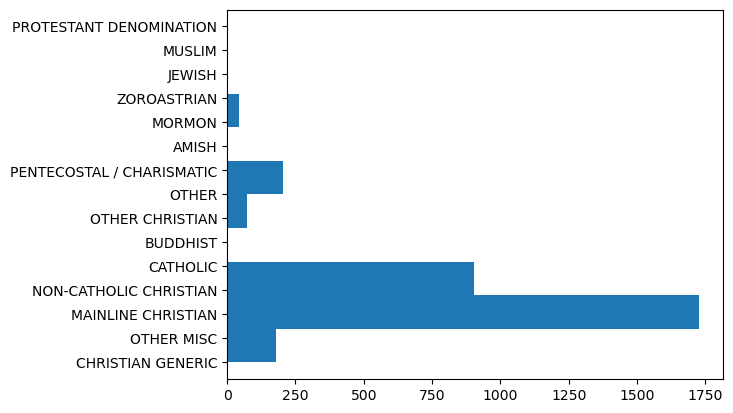

In [49]:
# !!! waiting for education feature
plt.hist(elections['religion'], orientation= 'horizontal')
plt.show()

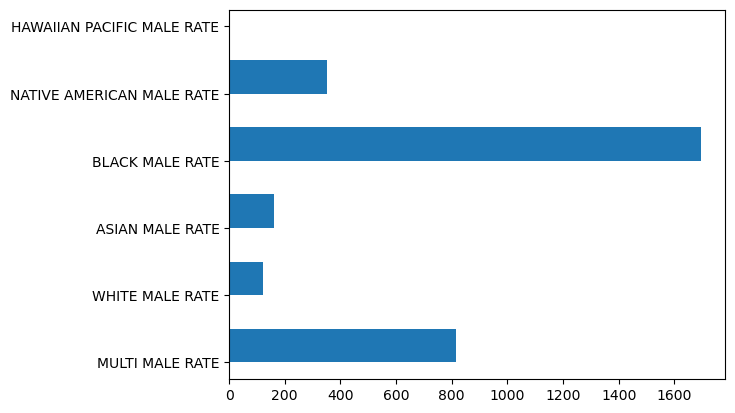

In [50]:
plt.hist(elections['ethnic_male'],orientation= 'horizontal')
plt.show()

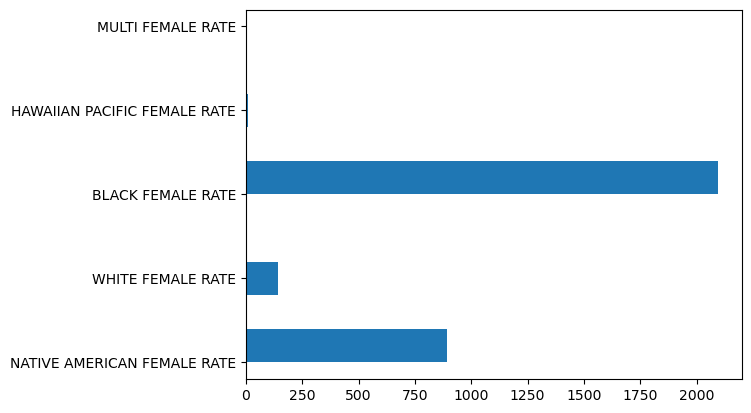

In [51]:
plt.hist(elections['ethnic_female'], orientation= 'horizontal')
plt.show()

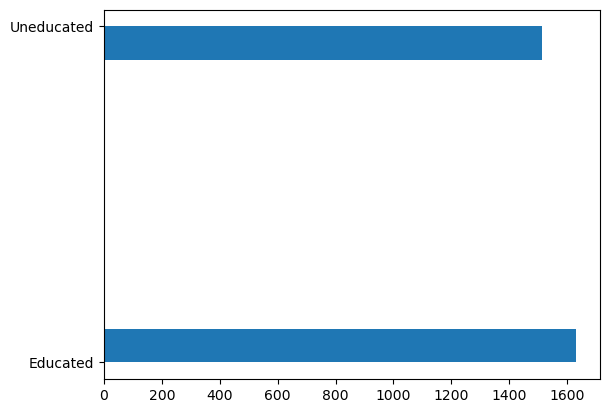

In [52]:
plt.hist(elections['education'],orientation= 'horizontal')
plt.show()

        2D scatter plot of 'area' and 'population' features

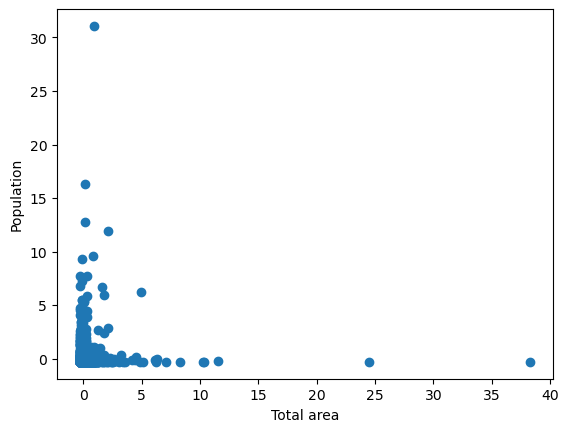

In [53]:
plt.scatter(elections['total_area'],elections['population'])
plt.xlabel('Total area')
plt.ylabel('Population')
plt.show()

        Box plot of 'voter turnout' and 'unemployment' features

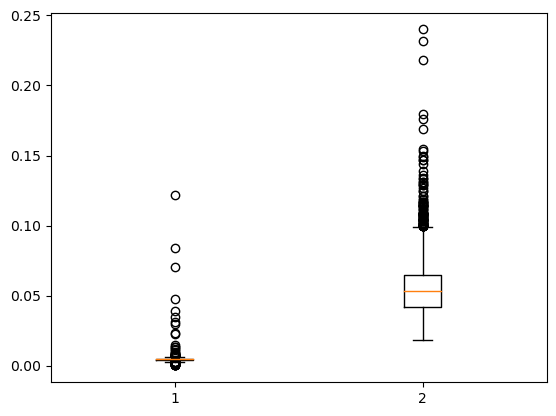

In [54]:
elections['voter_turnout'] = elections['voter_turnout'].apply(lambda x: x/100.0)
plt.boxplot([elections['voter_turnout'], elections['unemployment']])
plt.show()


Problem 1.8

    nonsensical samples are exists
    After I try dropna() to the whole dataframe, I found that five samples were deleted. 
    There exist NaN value in those samples which is ninsenscial.
    We have five nonsensical samples.

In [55]:
#elections.dropna(inplace = True)
elections

,votes,unemployment,med_hhinc,per_capita_inc,poverty_all_ages_pct,deep_pov_all,deep_pov_children,population,total_area,pop_density,...,democrat,county,state,education,religion,age_young,age_adult,age_old,ethnic_male,ethnic_female
0,709,0.025,0.013925,0.632577,0.160,0.034402,0.012097,-0.309668,0.224536,-0.151650,...,0,Sioux County,NE,Educated,CHRISTIAN GENERIC,0.266667,0.318254,0.350794,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE
1,208980,0.077,-0.434025,0.175301,0.233,0.120282,0.192827,1.671541,-0.291825,4.295715,...,1,Baltimore city,MD,Educated,OTHER MISC,0.322959,0.435202,0.205249,WHITE MALE RATE,WHITE FEMALE RATE
2,77261,0.027,1.220613,1.722184,0.110,0.056108,0.050497,0.186662,-0.154005,0.017122,...,1,Chittenden County,VT,Educated,MAINLINE CHRISTIAN,0.342702,0.385663,0.221964,ASIAN MALE RATE,BLACK FEMALE RATE
3,7471,0.125,-0.322409,0.118294,0.174,0.063867,0.100785,-0.296086,1.692479,-0.151186,...,0,Prince of Wales-Hyder Census Area,AK,Uneducated,OTHER MISC,0.319734,0.390365,0.221781,BLACK MALE RATE,BLACK FEMALE RATE
4,136392,0.039,1.605231,2.295051,0.082,0.042655,0.052549,0.293752,-0.101143,0.031442,...,0,St. Johns County,FL,Educated,MAINLINE CHRISTIAN,0.286295,0.377837,0.261882,BLACK MALE RATE,BLACK FEMALE RATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,10197,0.049,0.337031,0.218274,0.124,0.056540,0.084944,-0.247538,-0.205191,-0.123299,...,0,Clinton County,MO,Educated,CATHOLIC,0.310107,0.369887,0.258043,MULTI MALE RATE,BLACK FEMALE RATE
3141,16433,0.064,-0.521168,-0.377396,0.231,0.103015,0.196354,-0.180727,-0.040063,-0.128749,...,0,Union County,AR,Uneducated,MAINLINE CHRISTIAN,0.320496,0.370466,0.255231,BLACK MALE RATE,BLACK FEMALE RATE
3142,968,0.024,-0.554652,-0.372484,0.118,0.028213,0.036782,-0.307309,-0.166531,-0.149910,...,0,Garfield County,NE,Educated,MAINLINE CHRISTIAN,0.251479,0.292899,0.380178,MULTI MALE RATE,BLACK FEMALE RATE
3143,13763,0.068,-0.501655,-0.275662,0.155,0.061139,0.071230,-0.207821,-0.173186,-0.116573,...,0,Greene County,IN,Uneducated,MAINLINE CHRISTIAN,0.291668,0.373848,0.267347,MULTI MALE RATE,NATIVE AMERICAN FEMALE RATE


Problem 1.9

    The name of the label vector is 'democrat'

In [56]:
elections.to_csv('elections_clean.csv',index=False)